# Machine Learning - Conceitos Básicos

## Esse projeto tem como objetivo, explicar e navegar pelas principais noções de aprendizado de máquina e algoritmos. Esse projeto se concentra em um conteúdo mais básico e seu intuito é servir de material de revisão e estudo

### Para compreendermos melhor as ideias básicas do ML(Aprendizado de Máquina) vamos contar um pouco sobre sua aplicabilidade e métodos

##### Temos dois tipos de Aprendizado de Máquina:

- #### Aprendizado supervisionado, onde temos um rótulo ou target que passamos ao modelo para servir de previsão

- #### Aprendizado não supervisionado, onde não há dados de rótulo ou target

## Principais possíveis problemas para más performances dos algoritmos:

- #### Overfitting -> corrigido dando-se pesos (regularizações, ou alterando-se hiperparâmetros para mais simples), penalizando o modelo ou tratando outliers (possíveis causadores) - Simplifique o modelo

- #### Underfitting -> Escolha outro modelo ou acrescente mais hiperparâmetros ao atual

- #### Amostra treino com baixa representabilidade -> certifique-se que sua amostragem é representativa da população (pode-se usar testes estatísticos e até métodos de amostragem estratificada para variáveis categóricas ou ordinais)

- #### Ruídos, NaN ou outliers -> todos podem impactar negativamento o algoritmo

- #### Escalas diferentes e distribuições não Gaussinas em alguns modelos -> alguns modelos como o Linear Regression, se beneficiam de escalas entre features e target iguais e distribuições normais dos dados

- #### Seleção de Features



#### ***Uma rápida explicação: modelos com features ruins ou com uma grande variadade tendem a performar mal ou causar overfitting, para selecionar boas features temos algumas opções. Não só conhecimento de negócio pode ser considerada como podemos aplicar testes t e f entre a feature com a variável resposta (target), caso as diferenças médias sejam significativas, temos uma boa feature. Também vale a pena, *para modelos lineares*, ter features com boas correlações. Outras formas são usando algoritmos como PCA para redução de dimensionalidade como veremos mais ao final do projeto***

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Algoritmos Paramétricos

Os algoritmos paramétricos fazem suposições fortes sobre a forma da função de mapeamento entre entradas e saídas, geralmente assumindo uma forma funcional específica e um número fixo de parâmetros a serem estimados. Eles são adequados quando essas suposições são razoáveis e podem ser computacionalmente eficientes.

### Regressão Linear Simples e Múltipla

- Supõe uma relação linear entre variáveis independentes e a variável dependente.
- O modelo é definido por um número fixo de parâmetros (coeficientes e intercepto).

### Regressão Logística

- Supõe uma relação linear entre variáveis independentes e o logaritmo das odds da variável dependente.
- Usada para problemas de classificação binária.

### Análise Discriminante Linear (LDA)

- Supõe que as classes são gaussianas com uma matriz de covariância comum.
- Utiliza estatísticas paramétricas para realizar a classificação.

### Análise Discriminante Quadrática (QDA)

- Similar ao LDA, mas permite que cada classe tenha sua própria matriz de covariância.

## Algoritmos Não Paramétricos

Os algoritmos não paramétricos não fazem suposições fortes sobre a forma da função de mapeamento e são geralmente mais flexíveis. Eles podem se adaptar a uma ampla variedade de formas de dados e são mais robustos a outliers e distribuições não normais.

### K-Nearest Neighbors (KNN)

- Classifica ou prevê com base nos k vizinhos mais próximos no espaço de entrada.
- Não assume uma forma específica para a função de mapeamento.

### Árvores de Decisão

- Divide o espaço de entrada em regiões homogêneas com base em divisões binárias.
- Adequado tanto para classificação quanto para regressão.

### Support Vector Machines (SVM)

- Pode ser usado para classificação e regressão.
- Utiliza funções de kernel para transformar os dados em um espaço dimensional superior onde uma fronteira de decisão linear pode ser encontrada.

### Floresta Aleatória (Random Forest)

- Conjunto de árvores de decisão, cada uma construída a partir de uma subamostra do conjunto de dados.
- Melhora a robustez e reduz a variância.

### Gradient Boosting

- Combina vários modelos fracos (geralmente árvores de decisão) para criar um modelo forte.
- Utilizado tanto para classificação quanto para regressão.

## Conclusão

- **Algoritmos Paramétricos:** Supõem uma forma específica para a função de mapeamento (ex.: linearidade) e têm um número fixo de parâmetros. Exemplos incluem regressão linear, regressão logística, LDA, e QDA.
- **Algoritmos Não Paramétricos:** Não fazem suposições fortes sobre a forma da função de mapeamento e são flexíveis para se adaptarem a diferentes formas de dados. Exemplos incluem KNN, árvores de decisão, SVM, Random Forest, e Gradient Boosting.

A escolha entre algoritmos paramétricos e não paramétricos depende da natureza dos seus dados, das suposições que você pode ou não fazer sobre eles, e do objetivo do seu modelo.

## O primeiro passo, antes de qualquer aplicação, será dividir seus dados em dados de treino e teste afim de poder verificar a capacidade de generalização dos seus dados, visto que modelos comumente são importantes para prever resultados futuros, ou seja, é necessário ser um bom generalizador

In [1]:
#O primeiro passo é sempre seccionar seus dados em dados de treinamento e teste

#podemos fazer isso com train_test_split do sklearn ou StratifiedShuffleSplit

import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42) #aqui criamos algumas matrizes X e vetores Y onde 33% dos dados originais serão treino e o restante teste

#Pela facilidade, o train_test_split pode ser preferível, porém é mais aplicado quando a quantidade de dados (instâncias) for grande o suficiente para não ter viés
# de amostragem e acabar treinando um modelo com dados não representativos 



In [2]:
#Quando temos alguma variável importante e/ou precisamos ter certeza de que os dados seguem uma distribuição proporcional de variáveis usando o método de amostragem
# estratificada
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
X = df.drop('target', axis=1)
y = df['target']

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Combinar as features e o target para obter os DataFrames finais de treino e teste
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

# Imput Missing Values - Univariate and Bivariated

Dados do mundo real constantemente apresentam NaN, missing values ou até dados errados como alturas negativas

Esses dados podem causar performances ruins ou abaixo de algoritmos, portanto é necessário preenchê-los 

O Sklearn nos auxilia com o SimpleImputer ou KNNImputer

O primeiro é um processo Univariado com SimpleImputer, onde o hiperparâmetro missing_values pode ser np.nan (default), algum valor específico ou np.inf e o hiperparâmetro strategy que pode ser mean (default), median, most_frequent e constant (nesse caso é preciso definir o valor no hiperparâmetro fill_value)


***class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)***


Outro método, KNNImputer, já inputa valores conforme seus vizinhos próximos 

O importante nesse caso é escolher uma boa n_neighbors e qual distância usar. Caso a distribuição de seus dados não possuem muitos outliers ou é uma distribuição homogênca, é comum usar valores maiores de n_neighbors. Já o contrário, é indicado valores menores para que os outliers não interfiram tanto. Agora, a distância é definida para euclidiana quando os dados são contínuos sua aplicabilidade é melhor e é menos robusta a outliers. Já a distância de manhattan é útil quando os dados possuem mais outliers e também é melhor aplicável quando dados são discretos e/ou séries temporais

***class sklearn.impute.KNNImputer(*, missing_values=nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False, keep_empty_features=False)***



In [3]:
from sklearn.impute import SimpleImputer
data = {
    'feature1': [7, 4, 10],
    'feature2': [2, np.nan, 5],
    'feature3': [3, 6, 9]
}
df = pd.DataFrame(data)


imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') #strategy pode ser mean, median, most_frequent e constant (mas nesse caso chamamos o hiperparametro 
#fill_value = )

imp_mean.fit_transform(df) #faz o fit e o transform ao mesmo tempo

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])

In [4]:
from sklearn.impute import KNNImputer

data = {
    'feature1': [7, 4, 10, np.nan],
    'feature2': [2, np.nan, 5, 4],
    'feature3': [3, 6, 9, 8]
}
df = pd.DataFrame(data)

imputer = KNNImputer(n_neighbors=2)

imputer.fit_transform(df)

# As implicações do KNNImputer:
# Custo computacional
# Útil quando as variáveis são correlacionadas

array([[ 7.,  2.,  3.],
       [ 4.,  3.,  6.],
       [10.,  5.,  9.],
       [ 7.,  4.,  8.]])

# Encoding Labels for Machine Learning

Manipulando dados Categóricos 
Modelos de AM não lidam bem com dados em texto ou categóricos, nesses casos, caso a variável tenha implicações importantes, fazemos sua transformação para dados
numéricos ou dummy

***sklearn.preprocessing.OrdinalEncoder(*, categories='auto', dtype=<class 'numpy.float64'>, handle_unknown='error', unknown_value=None, encoded_missing_value=nan, min_frequency=None, max_categories=None)***

OrdinalEncoder

Como Funciona:

- O OrdinalEncoder transforma variáveis categóricas em valores numéricos inteiros.

- Cada categoria em uma coluna é substituída por um número inteiro.

- A ordem dos números inteiros pode ser definida pelo usuário ou determinada automaticamente pela ordem das categorias encontradas nos dados.

In [5]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['Male','Female','Binary']]
enc = OrdinalEncoder(categories=categories) #escolhe a ordem que será os dados encoded das variáveis categóricas
data = {
    'feature1': [7, 4, 10, 5],
    'feature2': [2, 3, 5, 4],
    'feature3': ['Male', 'Female', 'Male', 'Binary']
}
df = pd.DataFrame(data)
enc.fit(df[['feature3']])
enc.categories_

[array(['Male', 'Female', 'Binary'], dtype=object)]

In [6]:
new = enc.fit_transform(df[['feature3']])
new

array([[0.],
       [1.],
       [0.],
       [2.]])

In [7]:
enc.inverse_transform(new)

array([['Male'],
       ['Female'],
       ['Male'],
       ['Binary']], dtype=object)

OneHotEncoder

Como Funciona:

- O OneHotEncoder transforma variáveis categóricas em uma matriz de valores binários.

- Cada categoria é representada por uma coluna separada, onde um valor 1 indica a presença da categoria e 0 indica a ausência.

- Isso elimina qualquer implicação de ordem entre as categorias.

***sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse_output=True, dtype=<class 'numpy.float64'>, handle_unknown='error', min_frequency=None, max_categories=None, feature_name_combiner='concat')***

In [8]:
from sklearn.preprocessing import OneHotEncoder


data = {
    'feature': ['low', 'medium', 'high', 'medium', 'low']
}
df = pd.DataFrame(data)

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['feature']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['feature']))
df = df.join(encoded_df)
print(df)

  feature  feature_high  feature_low  feature_medium
0     low           0.0          1.0             0.0
1  medium           0.0          0.0             1.0
2    high           1.0          0.0             0.0
3  medium           0.0          0.0             1.0
4     low           0.0          1.0             0.0


Escalonamento e Transformações

# Pre - Processing - centralização e escalonamento

Muitos algoritmos se beneficiam de dados normalizados e em iguais escalas. Para isso o Sklearn disponibiliza diversas ferramentas para melhor pre-processamento dos dados

**Os algoritmos podem ter baixo desempenho caso seus dados não sejam aproximados de uma distribuição Gaussiana: com média zero e desvio de 1**

Algoritmos como SVM ou Regularizações L1 e L2 operam melhor ou até esperam que as variáveis estejam próxima de uma média de zero ou com variâncias de ordens iguais.

Para isso, antes das transformações, costumamos fazer o escalonamento dos dados usando StandartScale para média 0 e desvio 1 ou até ou MinMaxScaler e MaxAbsScaler, ou RobustScaler (para dados com muitos outliers)



- ### StandartScaler:

$$
z = \frac{\text{valor original} - \text{média dos valores}}{\text{desvio padrão dos valores}}
$$

- ### MinMaxScaler:

$$
x' = \frac{\text{valor original} - \text{valor mínimo}}{\text{valor máximo} - \text{valor mínimo}}
$$

- ### MaxAbsScaler:

$$
x' = \frac{\text{valor original}}{\text{valor absoluto máximo}}
$$

- ### RobustScaler:

$$
x' = \frac{\text{valor original} - \text{mediana}}{\text{intervalo interquartil (IQR)}}
$$

#### ***Sklearn recomenda, para dados esparsos (ou seja, com diveros 0), usar o MaxAbsScaler ou StandartScale mas passando o hiperparâmetro with_mean=False***

**Para retornar seus dados à escala original basta usar o método inverse_transformation()**

class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)[source]


In [9]:
from sklearn.preprocessing import StandardScaler
x = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = StandardScaler().fit(x) #mais fácil interpretação 
scaler


StandardScaler()

In [10]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [11]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [12]:
max_abs_scaler = MaxAbsScaler() #por para dados esparsos
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [13]:
robust = RobustScaler() #melhor para dados repletos de outliers
X_train_robustscale = robust.fit_transform(X_train)
X_train_robustscale

array([[ 0.        , -1.        ,  1.33333333],
       [ 1.        ,  0.        ,  0.        ],
       [-1.        ,  1.        , -0.66666667]])

# Pre Processing - Transformation data to Gaussian distribution

Após o escalonamento, o próximo passo seria fazer a transformação caso seus dados escalonados não possuam uma distribuição aproximadamente normal (pode-se usar o teste de Shapiro para o teste ou Jarque-Bera). 

Mas deve estar se perguntando o porque o escalonamento é benéfico antes da transformação sendo que a transformação do Sklearn também diminuí as discrepâncias de variações

Bem, escalonar antes de uma transformação aumenta a eficácia de seu modelo de transformação (Quantile ou Power) melhorando a estabilização da variância e minimizando ao máximo a assimetria, principalmente quando se lida com valores muito grandes ou pequenos na transformação.

Sklearn oferece dois métodos de transformação, o QuantileTransformer e PowerTransformer

- **Quantile Transforms**: Transformam todas as características para uma mesma distribuição desejada, utilizando a função de distribuição cumulativa da característica e a função quantil da distribuição desejada. Esse método suaviza distribuições incomuns e é menos influenciado por valores atípicos, mas pode distorcer correlações e distâncias entre as características.

- **Power Transforms**: São transformações paramétricas que visam mapear dados de qualquer distribuição para uma distribuição Gaussiana (normal).

**Quantile Transforms**:

$$
x' = F^{-1}(\text{rank}(x) / (n + 1))
$$

onde:
- \( $F^{-1}$ \) é a função quantílica inversa (ou função de percentil) da distribuição desejada,
- \( $\text{rank}(x)$ \) é a posição de \( $x$ \) em uma lista ordenada de valores,
- \( $n$ \) é o número total de observações.




**Yeo-Johnson Transformation**: ***Atende a dados com valores 0 e negativos e lida bem com outliers***

$$
x' = 
\begin{cases} 
\frac{((x + 1)^\lambda - 1)}{\lambda} & \text{se } \lambda \neq 0 \\
\ln(x + 1) & \text{se } \lambda = 0
\end{cases}
$$

onde:
- \( $x$ \) é o valor original,
- \( $\lambda$ \) é o parâmetro de transformação.



**Box-Cox Transformation**: ***Estrita a dados positivos e com uma matemática mais simples***

$$
x' = 
\begin{cases} 
\frac{(x^\lambda - 1)}{\lambda} & \text{se } \lambda \neq 0 \\
\ln(x) & \text{se } \lambda = 0
\end{cases}
$$

onde:
- \( $x$ \) é o valor original,
- \( $\lambda$ \) é o parâmetro de transformação,
- \( $x$ \) deve ser positivo.

### Quantile 

class sklearn.preprocessing.QuantileTransformer(*, n_quantiles=1000, output_distribution='uniform', ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=True)


<Axes: ylabel='Count'>

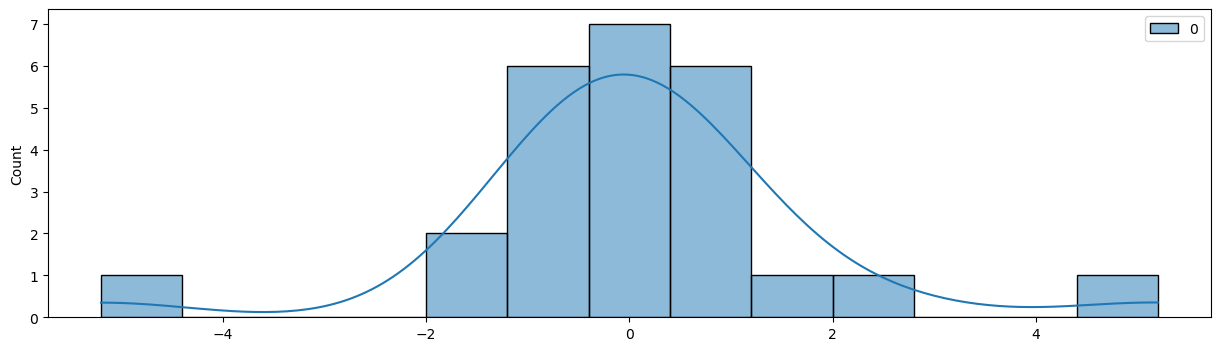

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
X = qt.fit_transform(X)
plt.figure(figsize=(15,4))
sns.histplot(X, kde=True)

### Power Transform

class sklearn.preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)


<Axes: ylabel='Count'>

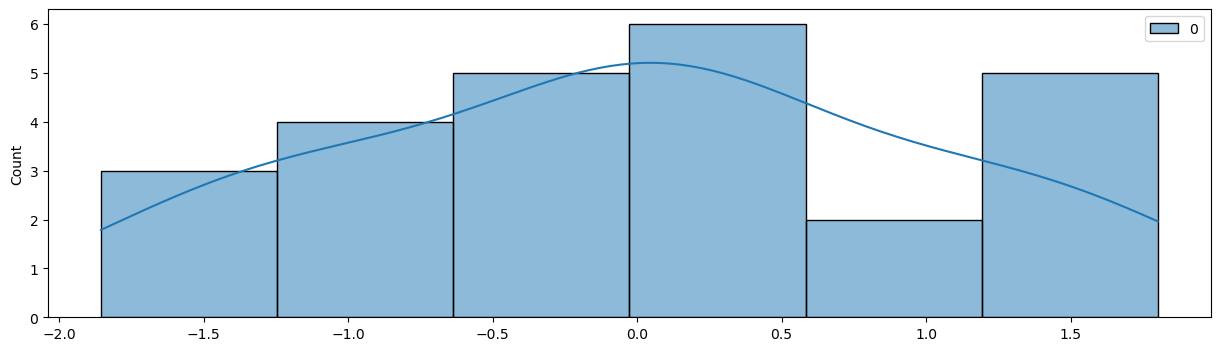

In [15]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
X = pt.fit_transform(X)
plt.figure(figsize=(15,4))
sns.histplot(X, kde=True)

<Axes: ylabel='Count'>

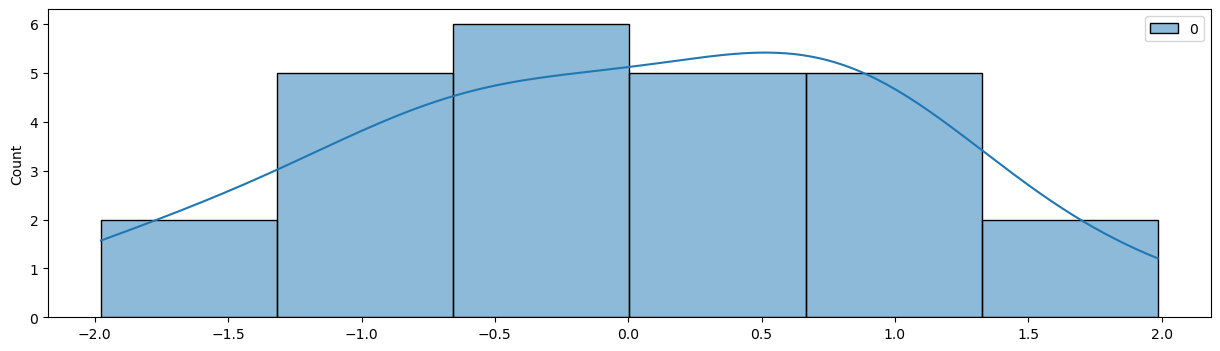

In [16]:
pt2 = PowerTransformer(method='box-cox')
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
X = pt2.fit_transform(X)
plt.figure(figsize=(15,4))
sns.histplot(X, bins='auto', kde=True)

# Optimize the Model

Após a escolha do algoritmo que melhor se adapta ao seu problema ou que apresenta melhor desempenho, é possível definir e ajustar seus hiperparâmetros para otimizar ainda mais o desempenho do modelo. Isso pode ser feito utilizando as ferramentas GridSearch ou RandomizedSearch do Scikit-Learn.

GridSearch
O GridSearch é uma técnica que permite testar várias combinações de hiperparâmetros especificados em uma grade de valores predefinidos. Ele busca exaustivamente a melhor combinação de hiperparâmetros, treinando e avaliando o modelo para cada combinação. Isso é feito através de validação cruzada, onde o conjunto de dados é dividido em partes menores para garantir que o modelo seja avaliado de forma justa e imparcial.

class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [17]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} #aqui depende do seu algoritmo usado
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, return_train_score=True) #outro hiperparm importante é scoring='neg_mean_squared_error' para regressões e return_train_score=True para poder montar
# um df de resultados
clf.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             return_train_score=True)

In [18]:
clf.best_estimator_

SVC(C=1, kernel='linear')

In [19]:
pd.DataFrame(clf.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

# Validation and Metrics Evaluation

Para avaliar se um modelo de machine learning tem boa capacidade de generalização, ou seja, se ele performa bem em dados novos e não vistos, usamos diversas técnicas de validação e ferramentas disponíveis no Scikit-learn. A abordagem padrão envolve dividir os dados em conjuntos de treino e teste, treinar o modelo nos dados de treino e avaliar sua performance nos dados de teste. Além disso, Scikit-learn oferece várias funções de métrica e métodos de validação cruzada para uma avaliação mais robusta.

### *Validação Cruzada*

A validação cruzada é uma técnica poderosa para avaliar a capacidade de generalização de um modelo. cross_val_score realiza várias iterações de treinamento e avaliação em diferentes subconjuntos dos dados, proporcionando uma avaliação mais robusta e confiável.

### *Funções de Métrica*

Scikit-learn fornece várias funções de métrica para avaliar diferentes aspectos da performance do modelo, como precisão, recall, F1-score, erro absoluto médio (MAE), entre outros.

### *Considerações Adicionais*

- Validação Cruzada Estratificada: Para problemas de classificação com classes desbalanceadas, a validação cruzada estratificada (StratifiedKFold) pode ser usada para garantir que cada fold tenha a mesma proporção de classes.

- Scoring Customizado: Você pode definir suas próprias métricas de avaliação e usá-las com cross_val_score ou outras funções de validação cruzada setando o hiperparâmetro ***scoring***



## Regression Metrics

### Para avaliar modelos de regressão, costuma-se usar três métricas principais:

### 1 Erro Médio Absoluto (Mean Absolute Error - MAE):

  - Descrição: O MAE é robusto a outliers e mede a média das diferenças absolutas entre as previsões e os valores reais.

  - Fórmula:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{y}_i - y_i|
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real.

### 2 Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE):

  - Descrição: O RMSE é mais sensível a outliers e mede a raiz quadrada da média dos erros quadráticos. É útil quando queremos penalizar erros maiores de forma mais severa.

  - Fórmula: 

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2}
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real.

### 3 Coeficiente de Determinação ($R^2$)

  - Descrição: O $R^2$ mede a proporção da variância dos dados que é explicada pelo modelo. Se 1, indica que o modelo explica perfeitamente a variabilidade dos dados, enquanto um coef de 0 indica que o modelo não explica nenhuma variabilidade.

  - Fórmula: 

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $y_i$ \) é o valor real,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $\bar{y}$ \) é a média dos valores reais.


### 4 Cross_Val_Score

Por padrão, se nenhum parâmetro scoring for especificado, o cross_val_score usa o coeficiente de determinação ($R^2$) como métrica de avaliação para regressões.

Porém é possível determinar qual métrica usar no hiperparêmtro setando scoring como:

  - ‘neg_mean_absolute_error’ para calcular MAE

  - ‘neg_mean_squared_error’ para calcular o MSE 

  Obs: MSE precisam ser transformados para positivos visto que o cross_val_score traz a função de máxima utilidade, e então se aplicado o np.sqrt() para o RMSE



In [20]:
from sklearn.metrics import mean_absolute_error #MAE
y_true = [3, 0.5, 2.5, 9]
y_pred = [2.5, 0.0, 2, 9]
mean_absolute_error(y_true, y_pred)

0.375

In [21]:
from sklearn.metrics import mean_squared_error
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print(f'MSE : {mean_squared_error(y_true, y_pred)}')

print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}')

MSE : 0.7083333333333334
RMSE: 0.8416254115301732


In [22]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lin_reg = linear_model.LinearRegression()
print(cross_val_score(lin_reg, X, y, cv=3))

[0.49842308 0.10377707 0.44394205]


In [23]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lin_reg = linear_model.LinearRegression()
mse = cross_val_score(lin_reg, X, y, cv=3, scoring='neg_mean_squared_error')
rmse = np.sqrt(-mse)
print(rmse)
print(f'Median: {rmse.mean()}')
print(f'Desvio: {rmse.std()}')

[52.22797785 59.00707618 59.36881186]
Median: 56.86795529496516
Desvio: 3.2842813737212992


# Classification Metrics

Para classificação as métricas usadas são Accuracy, Precision, Recall e F1 score e ROC/AUC.


### Accuracy

Accuracy seria mais bem utilizada caso seu target fosse balanceada nos dados de treino. Quando a variável alvo (target) é assimétrica, isso significa que uma classe pode estar muito mais presente do que a outra. Nesse cenário, simplesmente calcular a acurácia (accuracy) pode ser enganoso, pois um modelo que prevê apenas a classe majoritária pode ter uma alta acurácia simplesmente por acertar a classe mais frequente

$$
\text{Accuracy} = \frac{\text{Número de predições corretas}}{\text{Número total de amostras}}
$$

onde:
- Número de predições corretas é o número de previsões corretas feitas pelo modelo,
- Número total de amostras é o número total de amostras no conjunto de dados.

Nesses casos, seria mais aplicável a Matriz de Confusão e os demais cálculos

### A matriz de confusão traz 4 entradas TN[0:0] -> Verdadeiros Negativos, FP[0:1] -> Falsos Positivos, FN[1:0]-> Falsos Negativos, TP[1:1] -> Verdadeiros Positivos

TN -> Valores negativos previstos corretamente
FP -> Valores Previstos como Positivos mas eram para ser Negativos
FN -> Valores previstos como Negativos mas eram para ser Positivos
TP -> Valores positivos previstos corretamente

Disso temos uma boa ideia de como nosso algoritmo funciona

Dessa matriz podemos também definir a Precisão e a Revocação (Recall)

### Precisão:

A precisão mede a proporção de exemplos previstos como positivos que são realmente positivos.



$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

onde:
- \( $TP$ \) é o número de verdadeiros positivos,
- \( $FP$ \) é o número de falsos positivos.

É útil quando o foco está em minimizar falsos positivos, ou seja, quando é crucial que as previsões positivas sejam confiáveis.


### Revocação :

O recall mede a proporção de exemplos da classe positiva que foram corretamente identificados pelo modelo.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

onde:
- \( $TP$ \) é o número de verdadeiros positivos,
- \( $FN$ \) é o número de falsos negativos.

É uma taxa de verdadeiros positivos ou sensibilidade, é a proporção de valores positivos detectadas. É útil quando queremos minimizar os falsos negativos.


### F1 Score:

O F1 score é a média harmônica entre precision e recall, oferecendo uma única métrica que equilibra ambas.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}}
$$

onde:
- Precisão é a precisão do modelo,
- Recall é a sensibilidade do modelo.




#### ***O trade-off ocorre porque, geralmente, aumentar o recall de um modelo (ou seja, fazer com que ele identifique mais exemplos da classe positiva) leva a uma diminuição na precision (mais exemplos falsos positivos são previstos como positivos). Da mesma forma, aumentar a precision tende a diminuir o recall, pois o modelo será mais criterioso ao prever a classe positiva, reduzindo o número de exemplos verdadeiros positivos que ele identifica.***

O objetivo é encontrar um equilíbrio adequado entre recall e precision, dependendo do contexto do problema:

- **Contextos de Alta Precision: São situações onde é crucial minimizar os falsos positivos, mesmo que isso signifique reduzir o recall. Por exemplo, diagnósticos médicos onde é importante não cometer erros ao diagnosticar uma doença.**

- **Contextos de Alto Recall: São situações onde é crucial capturar a maioria dos exemplos da classe positiva, mesmo que isso signifique aceitar mais falsos positivos. Por exemplo, em detecção de fraudes financeiras, é fundamental identificar a maioria das transações fraudulentas, mesmo que algumas transações legítimas sejam erroneamente identificadas como fraudes.**

#### Para isso plotamos a curva PR para encontrar um limiar(threshold) para o modelo

*Toda vez que te perguntarem que precisam de um algoritmo com 90% de precisão, pergunte em quando nível de recall*



### ROC Curve e AUC score

Curva ROC e AUC (Area Under the Curve): A curva ROC mostra a taxa de verdadeiros positivos (recall) em função da taxa de falsos positivos (1 - especificidade), enquanto a AUC representa a habilidade do modelo em distinguir entre classes. É útil para entender como o modelo se comporta em diferentes limiares de decisão.

Quando mais distante a curva ROC estiver da constante, melhor classificador fica o mais distante da curva.
AUC score seria um cálculo da área da ROC curve, quanto mais próxima de 1, melhor é o modelo



### OBS:

***Se é mais importante os falsos positivos que os falsos negativos, opte pela curva PR (precision, recall), caso contrário, a curva ROC é a melhor opção, isso porque, quando queremos minimizar falsos positivos, queremos diminuir o recall com a melhor precisão possível e quando queremos diminuir falsos negativos, queremos o melhor limiar que diminuia os FP com a melhor revocação e quando as classes forem mais balanceadas***


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Classificador Binário

Definição: Na classificação binária, o objetivo é prever a qual de duas classes um ponto de dados pertence. Geralmente, as classes são rotuladas como positiva (1) e negativa (0), ou como classe 1 e classe 0. Ou True e False ou Falso e Positivo

In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

X, y = mnist["data"], mnist["target"]
X.shape

some_digit = X[0]

y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([False])

In [25]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9706, 0.9634, 0.9508])

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53982,   597],
       [ 1512,  3909]], dtype=int64)

In [27]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
recall_score(y_train_5, y_train_pred)

0.7210846707249585

In [28]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7875491084919916

In [29]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3, method='decision_function' )


precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

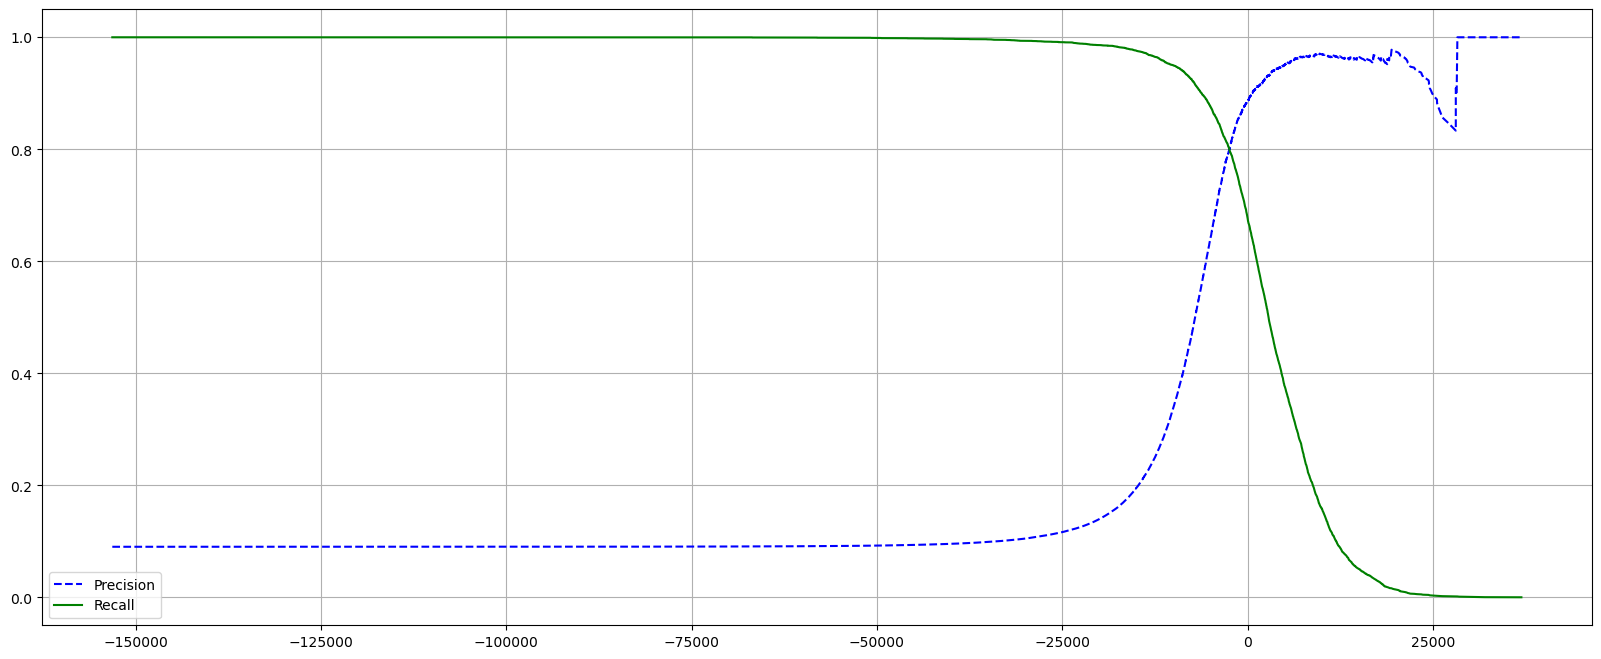

In [30]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1],'g-',label='Recall')
    [...]

plt.figure(figsize=(20,8))
plot_precision_recall(precisions, recalls, thresholds)
plt.legend()
plt.grid()
plt.show()

In [31]:
#Precisão começa a diminuir consideravelmente com 80% de recall. Caso queria uma precisão de 90% deve decidir algo por volta de -10000 de limiar

decision_scores = sgd_clf.decision_function(X_test)

threshold = 10000

y_pred = (decision_scores > threshold)

print("Previsões com limiar {}: {}".format(threshold, y_pred))

Previsões com limiar 10000: [False False False ... False False False]


In [32]:

precision = precision_score(y_test_5, y_pred)
recall = recall_score(y_test_5, y_pred)

print("Precisão com limiar {}: {:.2f}".format(threshold, precision))
print("Recall com limiar {}: {:.2f}".format(threshold, recall))

Precisão com limiar 10000: 1.00
Recall com limiar 10000: 0.04


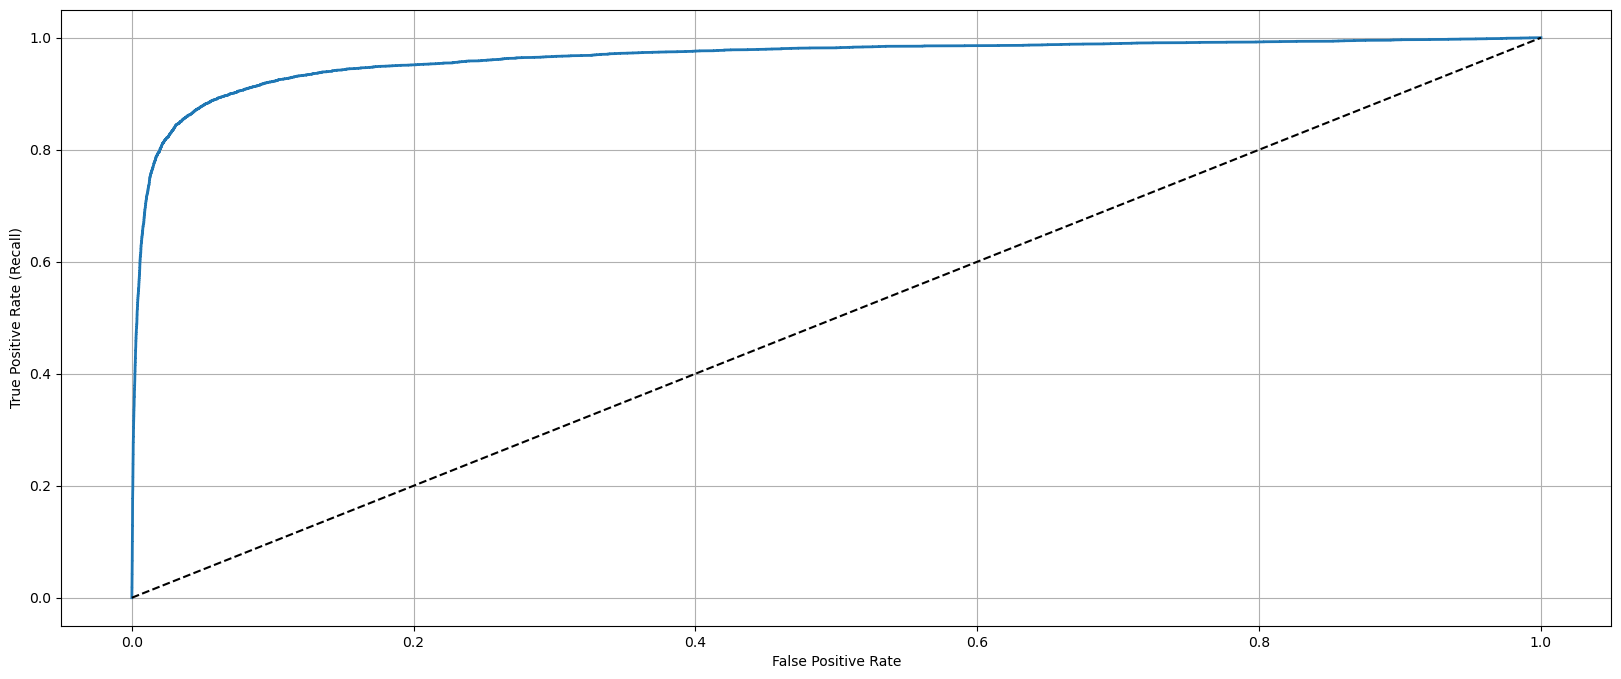

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(20,8))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')

plot_roc_curve(fpr,tpr)
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(y_train_5, y_scores)

0.9640834795473685

In [35]:
decision_scores = sgd_clf.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test_5, decision_scores)
roc_auc = auc(fpr, tpr)

recall_desejado = 0.82

idx = np.argmax(tpr >= recall_desejado)
limiar_recall_desejado = thresholds[idx]

print(f"Limiar para recall de {recall_desejado:.2f}: {limiar_recall_desejado:.2f}")

Limiar para recall de 0.82: -1836.09


In [36]:
y_pred_recall = (decision_scores >= limiar_recall_desejado)

precision = precision_score(y_test_5, y_pred_recall)
recall = recall_score(y_test_5, y_pred_recall)

print("Precisão com limiar {}: {:.2f}".format(threshold, precision))
print("Recall com limiar {}: {:.2f}".format(threshold, recall))



Precisão com limiar 10000: 0.74
Recall com limiar 10000: 0.82


##### Uma observação, o y_pred e y_pred_recall retornam valores True e False, sendo True valores positivos e False valores negativos 

# Classificador Multiclasse

Definição: Na classificação multiclasse, o problema envolve prever a qual de três ou mais classes um ponto de dados pertence. Cada classe pode ser identificada por um rótulo exclusivo.

Exemplo: Classificar imagens de dígitos manuscritos de 0 a 9, identificar o tipo de animal em uma imagem (cachorro, gato, pássaro, etc.).

Algoritmos como KNN ou Árvores de Decisão suportam modelagens multiclasses, SVM e SGD são próprios para problemas binários, mas podem ser adaptados para problemas multiclasses com métodos OvO ou OvR


One-vs-One (OvO) é uma estratégia usada para estender classificadores binários a problemas multiclasse. Em OvO, um classificador binário é treinado para cada par de classes
Para um problema com classes de 0 a 9, temos 10 classes no total. Então, o número de classificadores binários necessários seria: 45 (N * (N -1) / 2)

Cada um desses 45 classificadores é treinado para distinguir entre um par específico de classes. Por exemplo, um classificador pode ser treinado para distinguir entre as classes 0 e 1, outro para 0 e 2, e assim por diante.

Durante a predição, cada um desses classificadores faz uma predição, e a classe que recebe o maior número de "votos" é escolhida como a predição final.

Ou seja, quando se faz o predict() para cada instância ele fará a predição pelo melhor classificador OvO, após ter testado todos para a instância e selecionado o com maior voto

obs: O decision_function irá retornar uma lista para cada um dos targets 



In [37]:
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [38]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.86315, 0.87085, 0.88395])

In [39]:
sgd_clf.predict(X_test)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

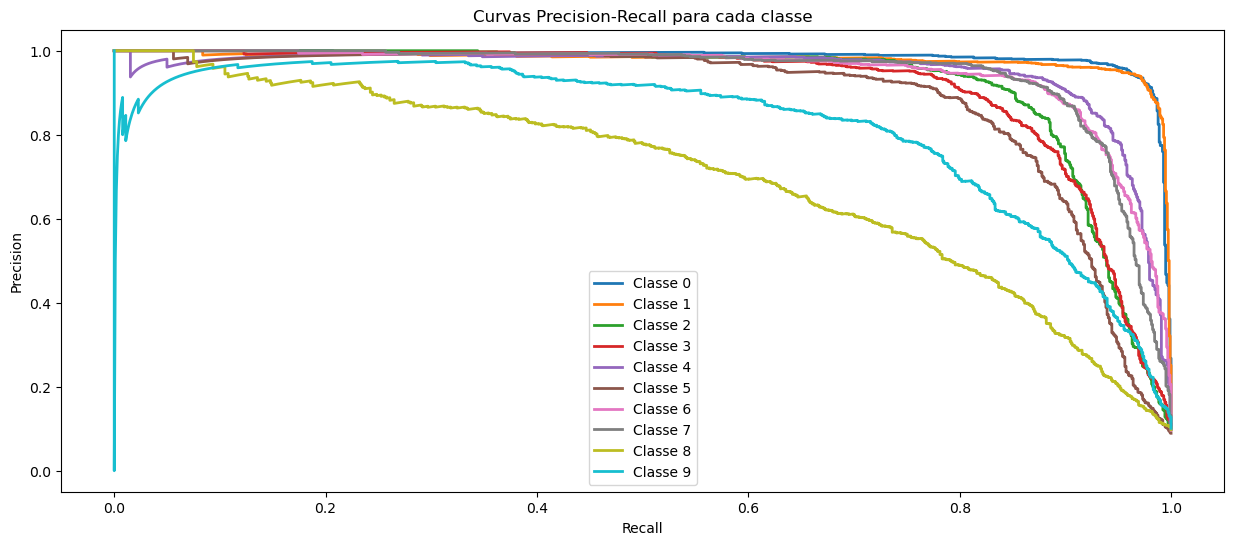

In [40]:
y_scores = sgd_clf.decision_function(X_test)


plt.figure(figsize=(15, 6))

for i in range(10):  # Existem 10 classes (0-9) no conjunto de dados MNIST
    precision, recall, thresholds = precision_recall_curve((y_test == i).astype(int), y_scores[:, i])
    plt.plot(recall, precision, lw=2, label='Classe {}'.format(i))


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curvas Precision-Recall para cada classe')
plt.legend(loc='best')
plt.show()




Seleção da Classe: Dependendo do seu contexto e do problema de classificação, pode haver uma classe específica para a qual você deseja ajustar o threshold. Por exemplo, se estiver trabalhando com um problema onde a classe positiva é mais crítica (por exemplo, detecção de fraudes), você poderia focar na curva Precision-Recall dessa classe.

Após examinar as curvas Precision-Recall para as classes relevantes, você pode escolher um threshold que otimize a precisão e o recall de acordo com suas necessidades.

In [41]:
# Encontrar o índice onde recall é acima de 40% e precisão é acima de 90% 
idx = np.argmax((recall >= 0.4) & (precision >= 0.9)) # isso irá depender da classe mais importante ou de qual estará analisando
    
selected_threshold = thresholds[idx]

In [42]:
decision_scores = sgd_clf.decision_function(X_test)


# Escolhendo a classe com maior pontuação de decisão
y_pred = np.argmax(decision_scores, axis=1)

# Aplicando um limiar às pontuações de decisão para cada classe
y_pred_thresholded = (decision_scores > selected_threshold)

# Selecionando a classe com score acima do threshold para cada instância
y_pred_with_threshold = np.argmax(y_pred_thresholded, axis=1)

print("Previsões com limiar {}: {}".format(threshold, y_pred_with_threshold))

Previsões com limiar 10000: [7 2 1 ... 0 5 6]


In [43]:
for i in range(10):  # Para 10 classes NO NOSSO CASO
    precision = precision_score((y_test == i).astype(int), y_pred_thresholded[:, i])
    recall = recall_score((y_test == i).astype(int), y_pred_thresholded[:, i])
    print(f"Classe {i}: Precisão = {precision:.2f}, Recall = {recall:.2f}")

Classe 0: Precisão = 0.97, Recall = 0.94
Classe 1: Precisão = 0.94, Recall = 0.97
Classe 2: Precisão = 0.98, Recall = 0.70
Classe 3: Precisão = 0.71, Recall = 0.90
Classe 4: Precisão = 0.98, Recall = 0.64
Classe 5: Precisão = 0.90, Recall = 0.78
Classe 6: Precisão = 0.98, Recall = 0.67
Classe 7: Precisão = 0.97, Recall = 0.79
Classe 8: Precisão = 0.93, Recall = 0.23
Classe 9: Precisão = 0.90, Recall = 0.56


Agora vamos aperfeiçoar o modelo vendo onde podemos melhorar, qual classe ou target precisa de mais peso ou mais exemplos,para isso analisamos mais detalhadamente os Erros com uma matriz de confusão onde cada bloco é pintado conforme predições

Esse é um excelente método para avaliar modelos multiclasse

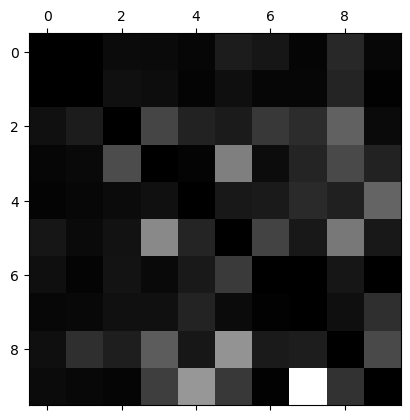

In [44]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

conf_max = confusion_matrix(y_train, y_train_pred)

row_sums = conf_max.sum(axis=1, keepdims=True)
norm_conf_max = conf_max / row_sums

np.fill_diagonal(norm_conf_max, 0)

plt.matshow(norm_conf_max, cmap=plt.cm.gray)

plt.show()

#Linhas representam as classes reais e as colunas as classes previstas, e quando mais claro o bloco mais erros a classe obteve

# Regressões

Regressão Linear pelo método dos mínimos quadrados é criada a partir do LinearRegression no Scikit-Learn

Esse método busca a curva que minimiza a função de custo para o MSE 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real.




In [45]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [47]:
lin_reg.intercept_

array([4.43552444])

In [48]:
lin_reg.coef_

array([[3.03238548]])

In [49]:
x_novo = np.array([[0], [2]])
lin_reg.predict(x_novo)

array([[ 4.43552444],
       [10.50029541]])

In [50]:
lin_reg.score(X, y) # R²

0.976529499839272

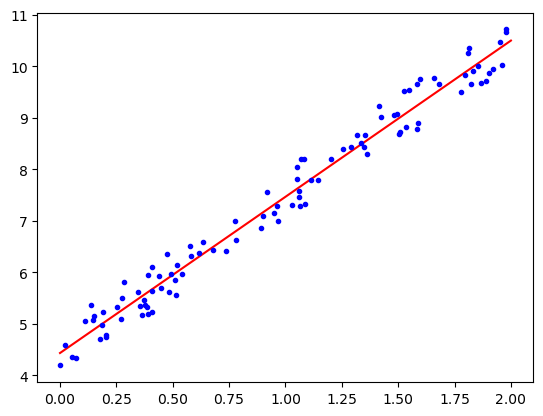

In [51]:
plt.plot(x_novo, lin_reg.predict(x_novo), 'r-')
plt.plot(X, y, 'b.')
plt.show()


## Regressão pelo método GD (Gradiente Descendente)

é um método cuja ideia é ir ajustando o parâmetro, em uma inicialização aleatória, e vai diminuindo consecutivamente até encontrar o gradiente zero, ou o mínimo de erro.

Ou seja, com uma inicialização aleatória, o modelo vai diminuindo gradativamente, conforme a taxa de aprendizado escolhida, parâmetro na função de custo até que seu valor seja zero (gradiente) ou seja, mínimo.

Taxas de aprendizado muito alta podem acabar passando do ponto mínimo e não alcançar o melhor ponto, e taxas muito baixas aumentam a necessidade computacional do modelo

É um método que, na função de custo, se calcula a derivada de cada ponto de tangência e com isso a variação do ponto até alcalçar seu mínimo

###  - **Gradiente Descendente em batch**

Para a seu uso, precisamos calcular quanto se altera a função de custo com as pequenas alterações do parâmetro. O que chamamos de derivadas parciais

$$
\vec{\nabla}_{\text{MSE}}(\vec{\theta}) = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \vec{x}_i
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\vec{x}_i$ \) é o vetor de características da \($i$\)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.

A próxima etapa, seria subtrair a taxa de aprendizado $\alpha$ de cada iteração 

$$
\vec{\theta} = \vec{\theta} - \alpha \vec{\nabla}_{\text{MSE}}(\vec{\theta})
$$

onde:
- \($\vec{\theta}$) são os parâmetros do modelo,
- \($\alpha$) é a taxa de aprendizado,
- \($\vec{\nabla}_{\text{MSE}}(\vec{\theta})$) é o vetor gradiente da função de custo MSE.


***A taxa de aprendizado $\alpha$ quando muito pequena pode acabar demorando muito para encontrar o ponto mínimo e quando muito alta pode acabar não chegando no resultado e atingindo platôs altos, para evitar use o GridSearchCV***

***O mesmo se segue para a quantidade de iterações, caso muito pequeno pode-se nunca chegar no gradiente zero e caso muito alto, perca tempo esperando um tempo exagerado, para encontrar um bom valor basta escolher um alto valor e interromper quando o vetor gradiente se tornar pequeno, ou a constante $e$ for irrisória***


###  - **Gradiente Descendente Estocástico**

O gradiente estocástico, ao contrário do batch, faz iterações e busca o mínimo vetor gradiente em instâncias aleatórias do conjunto.

Esse método tem como vantagem de ser menos pecaminoso quanto a complexidade computacional e ser mais rápido para conjunto de dados maiores, porém por sua natureza estocástica, aleatória, o algoritmo é menos regular

Porém é de grande ajuda quando a função de custo é irregular (ao invés de uma tigelar ela possuí subidas, descidas, declives, etc. Ou seja, busca-se o mínimo global) esse modo é preferível pois tende a escapar dos mínimos globais. O dilema desse método, entretanto, é reduzir **gradualmente** a taxa de aprendizado. As etapas começam em uma escala maior para pular o mínimo local e vai reduzindo gradualmente. 

No entanto, o SGD enfrenta o dilema de ajustar a taxa de aprendizado. É essencial reduzir gradualmente a taxa de aprendizado. As etapas começam em uma escala maior, permitindo que o algoritmo pule sobre mínimos locais, e vai reduzindo gradualmente para uma convergência mais precisa.

Se a taxa de aprendizado reduzir muito rápido, o algoritmo pode ficar empacado em um mínimo local. Por outro lado, se a redução for muito lenta, o algoritmo pode interromper o treinamento cedo demais, antes de encontrar o mínimo global. Portanto, o ajuste adequado da taxa de aprendizado é crucial para o sucesso do SGD.

Batch

In [52]:
eta = 0.1 #taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

X = 2 * np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1)

x_b = np.c_[np.ones((100,1)), X]

theta = np.random.rand(2,1)

for iterac in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [53]:
theta #params que minimizam o gradiente

array([[3.87781545],
       [3.02999141]])

Estocástico

class sklearn.linear_model.SGDRegressor(loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)

In [54]:
from sklearn.linear_model import SGDRegressor

#modelo sem regularização, penalty = None, roda 1000 iterações (max_iter) 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([3.82728966]), array([2.96549267]))

## Regressão Polinomial

Casos dados fujam de uma relação linear ou sejam complexos, um bom método de abordagem é adicionando polinomios à reta (às features), mas entende-se que quanto mais polinômios se adicione, maior a probabilidade sobreajuste (overfitting) do modelo

Os métodos para avaliar esse sobreajuste, como discutido antes, é não só analisar o RMSE como efetuar uma validação cruzada e avaliar o scores ou até analisar as curvas de aprendizado dos modelos

Um bom trabalho com Regressões Polinomias é avaliar o trade/off de viés e variãncia

Em ML se diz que falhas em generalizações se provém de três grandes variáveis:

- *Viés* : Refere-se às suposições erradas feitas pelo modelo, como assumir que a relação entre as variáveis é linear ou que a distribuição dos dados é normal. Escolher um modelo inadequado ou não complexo o suficiente pode resultar em um viés alto, levando a um desempenho ruim.

- *Variância* : Quanto maior a sensibilidade do modelo às variações dos dados de treinamento, maior a chance de overfitting. Modelos muito complexos têm um alto grau de variância, o que pode prejudicar a capacidade de generalização para novos dados.

- *Erro Irredutível* : Este é o ruído presente nos dados, como outliers e valores NaN, que não podem ser eliminados mesmo com o melhor modelo.

Normalmente, aumentar a complexidade do modelo aumenta a variância, enquanto diminuir a complexidade aumenta o viés. O objetivo é encontrar um equilíbrio adequado entre esses dois fatores, ou seja, um trade-off entre viés e variância.

Para determinar o melhor grau do polinômio e as penalidades eficientes para o modelo, podem ser utilizados métodos como regularização (Ridge, Lasso) que ajudam a controlar a complexidade e a variância do modelo, promovendo uma melhor generalização.

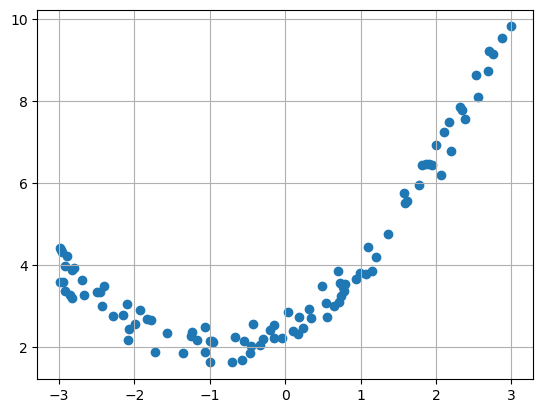

In [55]:
m = 100
x = 6 * np.random.rand(m,1)  - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(m,1)

plt.scatter(x, y)
plt.grid(True)
plt.show()

In [56]:
# A forma de adicionar polinômios é através do PolynomialFeatures do sklearn

from sklearn.preprocessing import PolynomialFeatures

var_polinomiais = PolynomialFeatures(degree=2, include_bias=False) #degrees é o polinômio desejado

x_poly = var_polinomiais.fit_transform(x) #adicionamos a cada instância de x um valor quadrático do valor original

x[0], x_poly[0]

(array([-1.99492309]), array([-1.99492309,  3.97971814]))

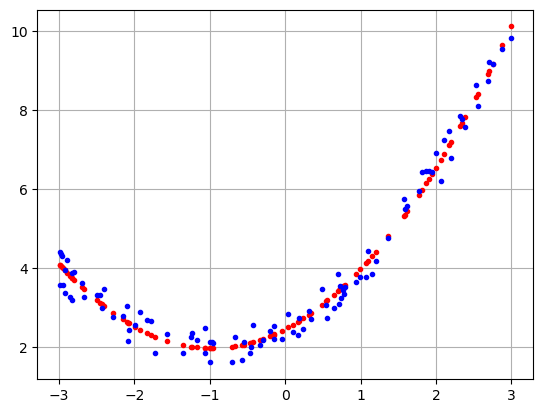

In [57]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)


plt.plot(x, poly_reg.predict(x_poly), 'r.')
plt.plot(x, y, 'b.')
plt.grid(True)
plt.show()

## Regressões GLM e Quantilica

- Regressões GLM (Modelos Lineares Generalizados)

Os Modelos Lineares Generalizados (GLM) são utilizados quando a variável target não segue uma distribuição normal ou quando lidamos com dados de contagem.

- Regressão de Poisson: 

Para variáveis target de contagem (variáveis quantitativas discretas), recomenda-se uma Regressão de Poisson com um log-link. Este tipo de regressão é apropriado para modelar a relação entre uma variável dependente de contagem e uma ou mais variáveis independentes.

- Regressão Gamma

Quando os dados são positivos, mas apresentam uma cauda achatada, recomenda-se uma Regressão Gamma com um log-link. Este modelo é adequado para variáveis contínuas positivas que possuem variância proporcional ao quadrado da média.

- Regressão com Distribuição Gaussiana Inversa

Para dados que possuem uma cauda mais pesada do que a de uma distribuição Gamma, pode-se utilizar uma Regressão com Distribuição Gaussiana Inversa. Este modelo é adequado para variáveis contínuas positivas com uma distribuição assimétrica e caudas pesadas.

- Regressão Quantílica

A Regressão Quantílica é útil quando se lida com outliers que não puderam ser removidos ou tratados, ou com distribuições mais dispersas nas extremidades - heterocedasticidade - (ou semelhantes à distribuição de Pareto). Ao invés de modelar a média condicional da variável dependente, a regressão quantílica permite modelar quantis específicos, fornecendo uma visão mais completa da relação entre as variáveis independentes e a variável dependente


GLM

In [58]:
from sklearn.linear_model import TweedieRegressor #exemplo do próprio Scuikit-Learn
reg = TweedieRegressor(power=1, alpha=0.5, link='log') #power 1 = Poisson., power 2 = Gamma, power 3 = Inverse Gaussian #link = log
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
TweedieRegressor(alpha=0.5, link='log', power=1)
reg.coef_, reg.intercept_

(array([0.24631611, 0.43370317]), -0.7638091359123443)

Quantilico

In [59]:
rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

in the first case, a heteroscedastic Normal noise is added;

in the second case, an asymmetric Pareto noise is added.

In [60]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

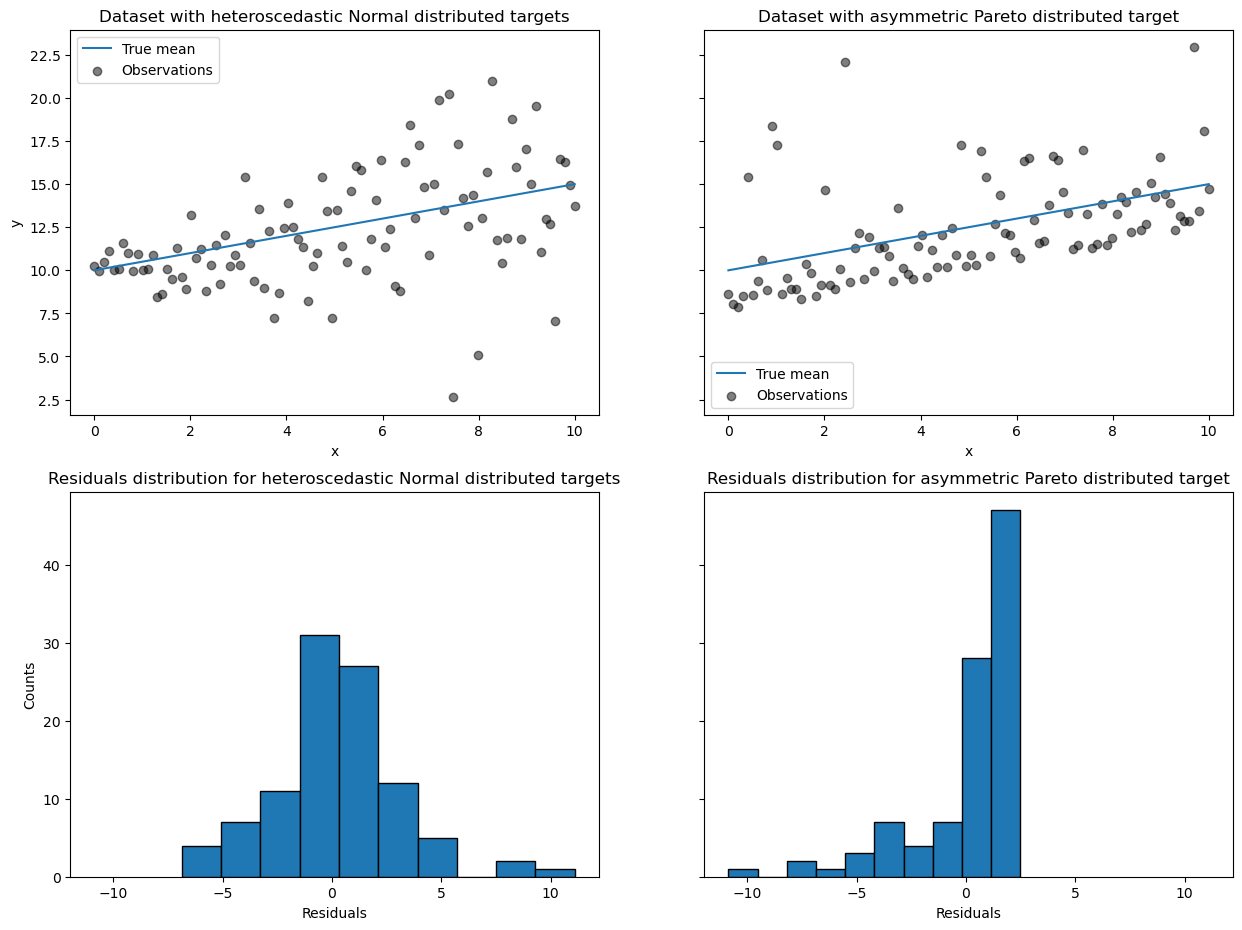

In [61]:
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs[0, 1].set_title("Dataset with asymmetric Pareto distributed target")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")

O exemplo do sklearn acima demostra como os dados estão, tanto com heterocedasticidade do lado esquerdo, perceba como os dados se tornam mais dispersos na ponta e do lado direito como os dados se aproximam de um pareto

In [62]:
from sklearn.utils.fixes import parse_version, sp_version #por erros de incompatibilidade, o sklearn nos obriga" a adicionar um solver específico
# This is line is to avoid incompatibility if older SciPy version.
# You should use `solver="highs"` with recent version of SciPy.
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

In [63]:
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95] # para criar diversas curvas, vamos analisar alguns quantis (como pede o sklearn)
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver) #aqui chamamos o solver
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

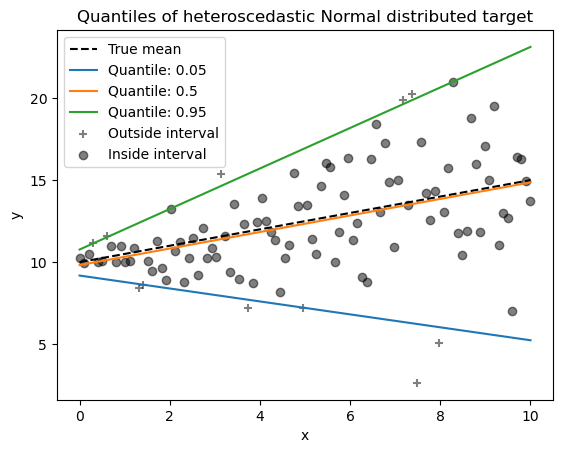

In [64]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

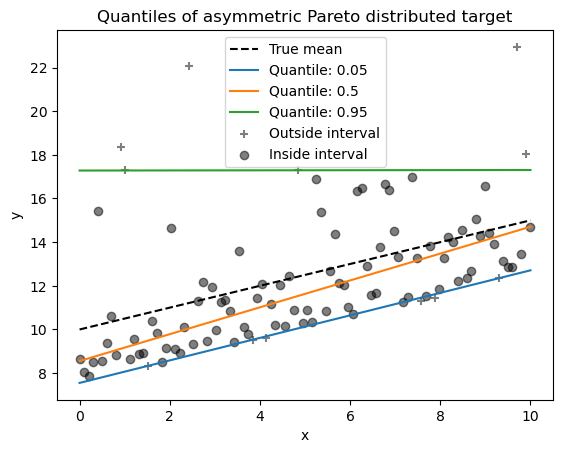

In [65]:
quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_pareto).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_pareto
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_pareto
        )
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_pareto[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_pareto[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of asymmetric Pareto distributed target")

# Regularização de Regressões

A melhor forma de resolver problemas de sobreajuste das regressões seria adicionar algumas pesos ao modelo, como regularizações Ridge, Lasso e Elastic Net.

- ### **Regressão Ridge  - L2**

Na regressão de Ridge um peso é adicionado a função de custo. Isso faz com que o modelo escolher a função com menor peso e ajusta os dados.

Ou seja, se adicona um termo de regularização dado por:

$$
\text{L2} = \lambda \sum_{j=1}^{m} \theta_j^2
$$

onde:
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

Função de custo da regressão de Ridge:

$$
J(\vec{\theta}) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^{m} \theta_j^2
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

Se $\alpha$ for muito grande todos os pesos acabarão muito próximos de zero e resultará em uma linha achatada que passa pela média


#### ***A regressão de Ridge recomenda que os dados sejam escalonados antes de sua aplicação***


A correção L2 é recomendada quando dados apresentam **multicolinearidade**, em dados com **muitas features e poucas amostras** e/ou modelos onde todas as **features importam**


- ### **Regressão Lasso - L1**

Uma regressão útil para quando acredita-se que há algumas features pouco importantes, que não farão efeitos, ou features com multicolinearidade que precisam ser consideradas

A regressão de Lasso também adiciona um termo de peso, mas dessa vez um termo L1, do vetor do peso, dado por:

$$
\text{L1} = \lambda \sum_{j=1}^{m} |\theta_j|
$$

onde:
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

A característica peculiar da regularização Lasso é que seu peso tende a suprimir características menos importantes do modelo

A função de custo da Regressão de Laço é dado por:

$$
J(\vec{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^{m} |\theta_j|
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).




#### **Nas funções do sklearn controle $\alpha$ para um Trade-off entre Viés e Variância - Use GridSearch ou validação cruzada para encontrar o melhor valor**

#### ***Um $\alpha$ maior indica maior viés***

#### ***Um $\alpha$ menor indica maior variãncia***


Ridge em regressões Minímos Quadrados 

In [66]:
from sklearn.linear_model import Ridge

rid_reg = Ridge(alpha=	1, solver='cholesky')
rid_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [67]:
rid_reg.predict([[1.5]])

array([[3.81150317]])

Ridge em regressões Gradiente Estocástico

In [68]:
sgd_rid = SGDRegressor(penalty='l2')
sgd_rid.fit(X,y.ravel())
sgd_rid.predict([[1.5]])

array([3.32960693])

Lasso em regressões Minímos Quadrados 

In [69]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.8524977])

Lasso em regressões Gradiente Estocástico 

In [70]:
sgd_rid = SGDRegressor(penalty='l1')
sgd_rid.fit(X,y.ravel())
sgd_rid.predict([[1.5]])

array([3.26912277])

# Elastic Net

### Elastic Net é uma regularização que une L1 e L2 onde a relação é controlado por um termo $r$

Função de custo de Elastic Net é dado por:

$$
J(\vec{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda_1 \sum_{j=1}^{m} |\theta_j| + \lambda_2 \sum_{j=1}^{m} \theta_j^2
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\lambda_1$ \) é o parâmetro de regularização L1,
- \( $\lambda_2$ \) é o parâmetro de regularização L2,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

***Comumente é recomendado o uso da Regressão de Ridge, porém caso acredite que tenham features que não são importantes, a Lasso ou Elastic Net são as mais recomendadas, sendo a Elastic Net mais recomendado.***

Você pode achar o melhor valor de l1_ratio usando o GridSearch

In [71]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio=0.5) #l1_ratio 0.5 significa a correlação entre L1 e L2

elastic_reg.fit(X,y)

elastic_reg.predict([[1.5]])

array([3.83265808])

# Regressão Logística

Regressão para classificação - Chamamos a regressão logística de classificador binário

Usada para prever a probabilidade de uma instância, ou mais, pertencer a uma classe (target) específico

Caso a probabilidade seja maior que 0.5 se diz que faz parte da classe (classe positiva 1), caso menor, dizemos que não pertence (classe negativa 0)

$$
J(\vec{\theta}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $y_i$ \) é o valor real da \($i$\)-ésima observação (0 ou 1),
- \( $\hat{y}_i$ \) é a probabilidade prevista pelo modelo para a \(i\)-ésima observação, dada por \( $\hat{y}_i = \sigma(\vec{\theta} \cdot \vec{x}_i)$ \),
- \( $\sigma$ \) é a função sigmoide, definida como \( $\sigma(z) = \frac{1}{1 + e^{-z}}$ \),
- \( $\vec{x}_i$ \) é o vetor de características da \($i$\)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.

A função sigmoide mapeia os valores previstos para o intervalo (0, 1), o que os torna interpretáveis como probabilidades.

Assim, a função de custo da regressão logística mede a diferença entre as probabilidades previstas e os valores reais, penalizando previsões incorretas de forma mais severa quanto mais erradas elas estiverem.

### Função de Custo

O modelo define seus parâmetros para estimar probabilidades altas como 1 e baixas como 0, sob a função:

$$
J(\vec{\theta}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(h_\theta(\vec{x}_i)) + (1 - y_i) \log(1 - h_\theta(\vec{x}_i)) \right]
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $y_i$ \) é o valor real da \(i\)-ésima observação (0 ou 1),
- \( $h_\theta(\vec{x}_i)$ \) é a probabilidade prevista pelo modelo para a \($i$\)-ésima observação, dada por \( $h_\theta(\vec{x}_i) = \sigma(\vec{\theta} \cdot \vec{x}_i)$ \),
- \( $\sigma(z)$ \) é a função sigmoide, definida como \( $\sigma(z) = \frac{1}{1 + e^{-z}}$ \),
- \( $\vec{x}_i$ \) é o vetor de características da \($i$\)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.


Assim como modelos de regressão lineares, a regressão logística também pode ser regularizada por L1 e L2. A função do sklearn adiciona a L2 por padrão, mas pode-se manipular a intensidade pelo hiperparm c (e não alpha como nos modelos anteriores)



## Regressão Softmax - Classificação Logística para problemas de Multiclasse

A regressão softmax calcula, primeiro, um score para cada classe e em seguinda estima a probabilidade de cada classe pela função softmax dada por:

- Score Softmax para a classe K

$$
P(y=k|\vec{x}; \vec{\theta}) = \frac{e^{\vec{\theta}_k \cdot \vec{x}}}{\sum_{j=1}^{K} e^{\vec{\theta}_j \cdot \vec{x}}}
$$

onde:
- \( $P(y=k|\vec{x}; \vec{\theta})$ \) é a probabilidade da amostra \( $\vec{x}$ \) pertencer à classe \( $k$ \),
- \( $\vec{\theta}_k$ \) é o vetor de parâmetros (pesos) para a classe \( $k$ \),
- \( $\vec{\theta}_j$ \) é o vetor de parâmetros (pesos) para a classe \( $j$ \),
- \( $\vec{x}$ \) é o vetor de características da amostra,
- \( $K$ \) é o número total de classes.

Após calcular o score de todas as features $x$ a função softmax calcular o score da classe para cada instância. 

***Geralmente os scores são chamados de log-odds***

A partir disso o objetivo é encontrar a função de custo miníma dada pela *entropia cruzada*

$$
J(\vec{\theta}) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{i,k} \log \left( P(y=k|\vec{x}_i; \vec{\theta}) \right)
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $K$ \) é o número total de classes,
- \( $y_{i,k}$ \) é um indicador binário que vale 1 se a observação \( $i$ \) pertence à classe \( $k$ \), e 0 caso contrário,
- \( $P(y=k|\vec{x}_i; \vec{\theta})$ \) é a probabilidade prevista de que a observação \( $i$ \) pertença à classe \( $k$ \), obtida através da função Softmax,
- \( $\vec{x}_i$ \) é o vetor de características da \( $i$ \)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.



Regressão Logística

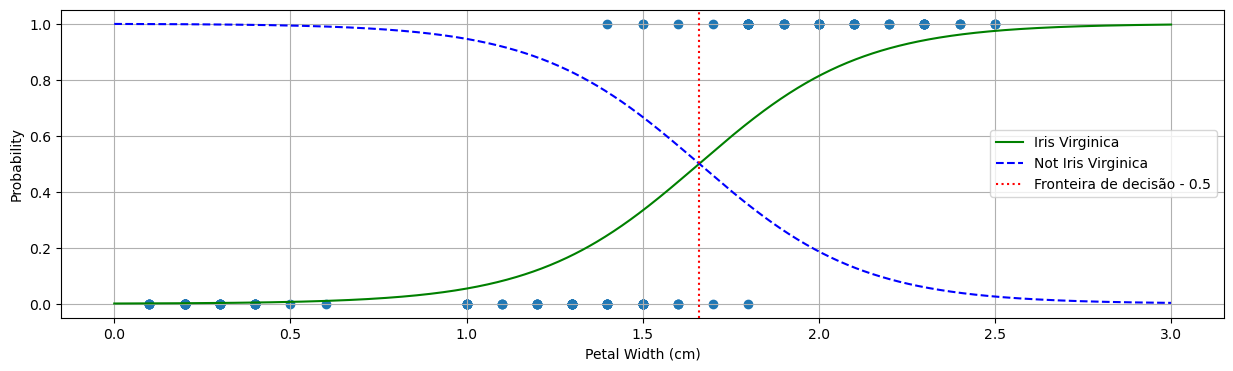

In [72]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

x_novo = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_novo)


diff = np.abs(y_proba[:, 0] - y_proba[:, 1]) #fazendo a subtração de valores modulares para poder encontrar o valor mínimo (menor diff) que seria nossa intersecção das retas (fronteira de decisão)
equal_prob_index = np.argmin(diff) #pegar o menor valor, sendo 0 já que o menor valor será a intersecção (onde ambos são iguais)
x_equal_prob = x_novo[equal_prob_index] #intersecção das fronteiras de decisão de cada label

plt.figure(figsize=(15,4))
plt.plot(x_novo, y_proba[:, 1], 'g-', label = 'Iris Virginica')
plt.plot(x_novo, y_proba[:, 0], 'b--', label = 'Not Iris Virginica')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.axvline(x_equal_prob, linestyle=':', color='r', label = 'Fronteira de decisão - 0.5')
plt.scatter(X, y)
plt.grid(True)
plt.legend()
plt.show()

Softmax

In [73]:
X = iris['data'][: , (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) #é preciso aplicar multinomial em multi_class e adiconar o solver lbfgs e controla
# a regularização L2 por C - quanto maior menor o efeito

softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

# SVM - Support Vector Machine

### Modelo para Regressão, Classificação e até, detecção de outliers

obs: originalmente feito para classificação em conjunto de dados pequenos ou médio

O parâmetro mais importante do SVM, como veremos, é o param $C$ (**margem de erro**) que podemos dizer que quanto maior maior a possibilidade de overfitting e quanto menor mais underfitting. Alguns valores típicos usados para primeiros testes são 0.01, 0.1, 1, 10, 100. Boas práticas para iniciar com um bom valor e depois aperfeiçoar com GridSearchCV seria analisar sensibilidade de diferentes $C$ em subconjuntos menores e validando por validação cruzada ou estimando ruas mais largas com $C$ menor ou mais estreitas com $C$ maior. Tudo dependerá do quanto você aceitará de dados marginais

#### ***Vale ressaltar que SVM tem uma altíssima sensibilidade a escalas e outliers de dados, portanto, é um modelo que exige em larga escala um pré-processamento dos dados para seu bom funcionamento***

### Classificação Linear da SVM

Quando há uma relação linear dentre duas ou mais features, podemos fazer uma classificação Linear com SVM usando o LinearSVC ou SVM(kernel = 'linear')

- #### Classificação Margem Larga


Um classificador SVM seria como desenhar três linhas que formam uma "rua" mais larga o possível, chamamos isso de ***"margem larga"***.

Cada limite das ruas são definidos por pontos de dados chamados de ***"support vectors"***. Pode-se entender que ao se criar instâncias fora da rua, a decisão da rua não será afetada pois isso não altera os vetores de suporte


- #### Classificação Margem Suave

Quando não há uma divisão clara dos dados, devemos usar uma margem suave, sabendo que teremos, dentro da "rua", violações de margem. A ideia é não escolher uma margem grande demais (pode gerar underfitting) nem pequena demais (overfitting). A premissa é encontrarmos o equilíbrio entre essas violações

Controlamos essa margem com o hiperparm $C$

Podemos plotar com SVC(kernel = 'linear', C = 1)

Ou usando SGDClassifier(loss = 'hinge', alpha = 1/(m*C)) - para uso do gradiente descendente -> sempre use loss = 'hinge' visto que não pe default

Ou LinearSVC(C = 1, loss='hinge') -> sempre use loss = 'hinge' visto que não pe default

### Classificação Não Linear

Há casos em que não existirá linearidade entre os dados ou uma linearidade fraca entre algumas features, nesse caso podemos adicionar característica polinomiais aos dados

- #### Kernel Polinomial

Nesse caso podemos usar o hiperparam degree nos SVM() e usar kernel = 'poly'

SVC(kernel = 'poly', degree = 3, coef0 = 1, C =1) - o coef0 adiciona um termo de bias ao produto escalar antes de elevar ao grau especificado pelo parâmetro.

O uso do kernel polinomial permite que o SVM projete os dados em um espaço de dimensão superior onde um hiperplano pode separar as classes de maneira mais eficaz. Isso é conhecido como o ***"kernel trick"***. Esse método não nos obriga a exponenciar os resultados para "trazer à escala original". O cálculo é feito dentro do algoritmo, e seus outputs já vêm nas escalas originais.

Lembrando que valores ideais para degree, coef0 e C podem ser encontrados com GridSearchCV e validação cruzada

- #### Kernel RBF Similaridade

Outra forma de lidar com dados não lineares é adicionar caraterística por similaridade que "computa o quanto cada instância se assemelha a um ponto específico"

O kernel RBF (Radial Basis Function) mede a similaridade entre os pontos de dados em relação a pontos de referência com base na **distância euclidiana**, e essa similaridade é usada para calcular os pesos (valores) atribuídos a cada instância.

Podemos usá-la com SVC(kernel = 'rbf', gamma = 5, C = 1)

O aumento de "gamma" \($y$\) torna a curva mais estreita e mais sobreajustada e instâncias tenham influências menores e o algortimo funcione por base dos pontos de referência. Caso se vá diminuindo "gamma" a curva se torna mais suave e ampla, onde as intâncias mais distantes terão mais influência. Portanto, aqui, gamma também é um hiperparm para controle de sobreajuste. Caso o modelo esteja sobreajustado, deve-se reduzi-lo aos poucos e vice-versa.



### Regressão SVM


É possível aplicar regressões, mas diferente da classificação, onde o algoritmo tenta criar a rua mais larga o possível com mínimas violações, a regressão se esforçar para encaixar todas as intâncias dentro da rua enquanto restringe violações

A largura da rua é controlada pelo hiperparâmetro $e$ ao invés do hiperparâmetro $C$

Podemos instanciar um algoritmo SVM de regressão usando LinearSVR(epsilon = )

Também podemos usar SVR(kernel = 'linear', C =, epsilon= ) 

SVR() também suporta os kernel tricks 'poly','rbf'



In [74]:
from sklearn.svm import LinearSVC

iris = datasets.load_iris()

x = iris['data'][:, (2, 3)]
y = (iris['target'] != 0)

model = LinearSVC(C = 1, loss='hinge')

model.fit(x, y)

model.predict([[5.5, 1.7]])

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([ True])

In [75]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_margin(X, y, model, title, xl, yl):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")

    ax = plt.gca()

    display = DecisionBoundaryDisplay.from_estimator(
        model, X, ax=ax, cmap=plt.cm.coolwarm, alpha=0.3,
          response_method='predict'
    )
    display.plot(ax=ax, cmap='viridis', alpha=0.0005)

    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

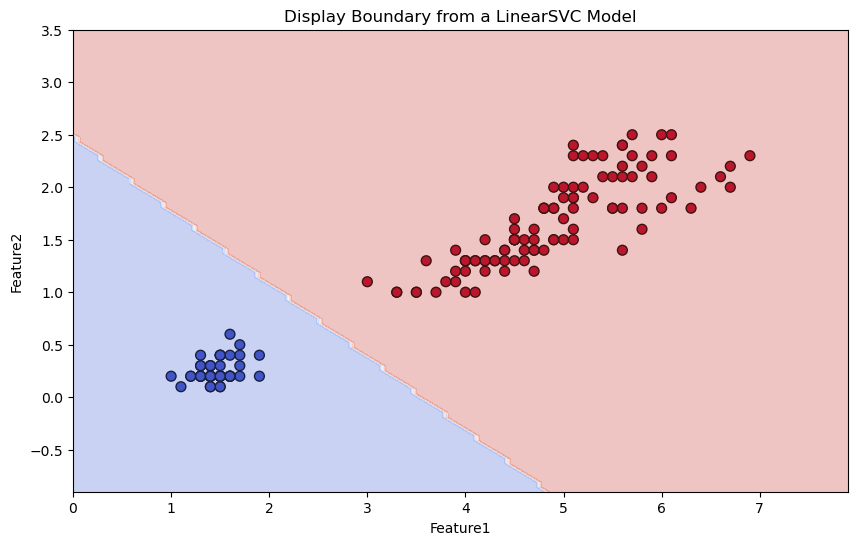

In [76]:

plot_decision_margin(x, y, model, 'Display Boundary from a LinearSVC Model', 'Feature1', 'Feature2')

In [77]:
# from sklearn import SGDClassifier

C = 1
model_gde = SGDClassifier(loss='hinge', alpha=1/(m*C))

model_gde.fit(x, y)

model_gde.predict([[5.5, 1.7]])

array([ True])

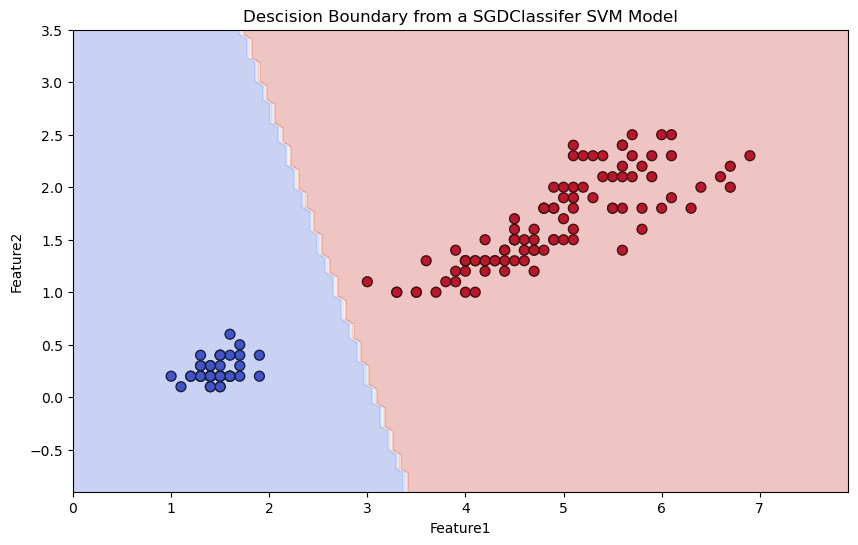

In [78]:
plot_decision_margin(x, y, model_gde,'Descision Boundary from a SGDClassifer SVM Model', 'Feature1', 'Feature2')

In [79]:
from sklearn.svm import SVC

model_svc = SVC(kernel='linear', C = 1)

model_svc.fit(x, y)

model_svc.predict([[5.5, 1.7]])

array([ True])

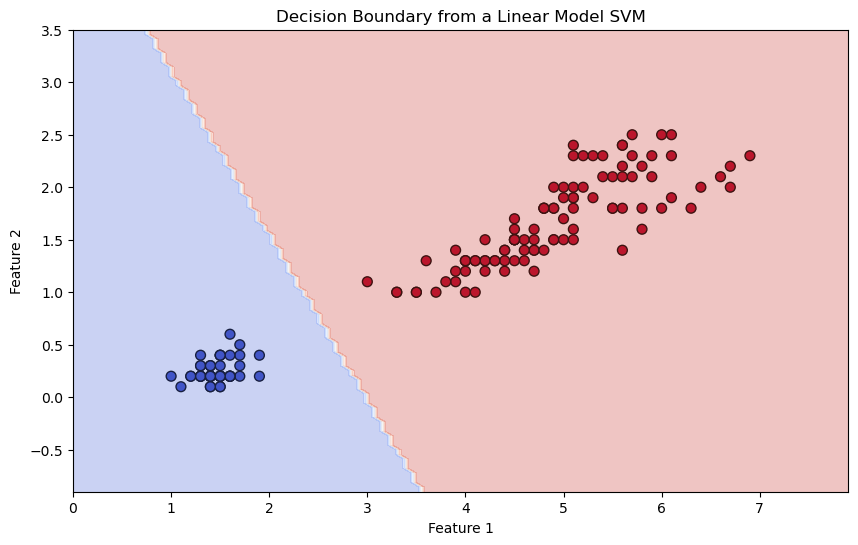

In [80]:
plot_decision_margin(x, y, model_svc, 'Decision Boundary from a Linear Model SVM', 'Feature 1', 'Feature 2')

SVM não Linear

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


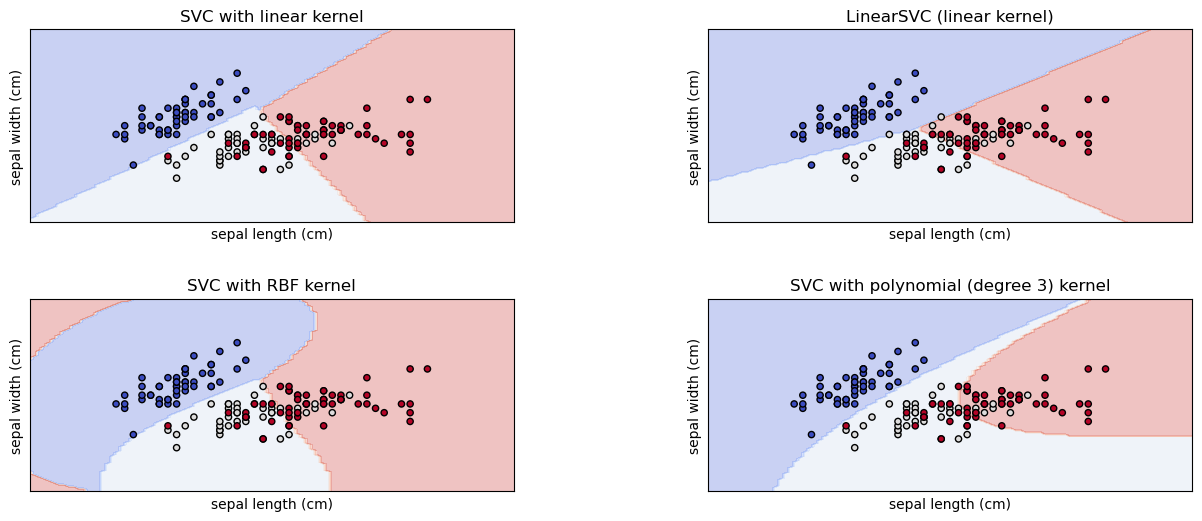

In [81]:
from sklearn import datasets, svm



iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target


C = 1.0  
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)


fig, sub = plt.subplots(2, 2, figsize=(15,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.3,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

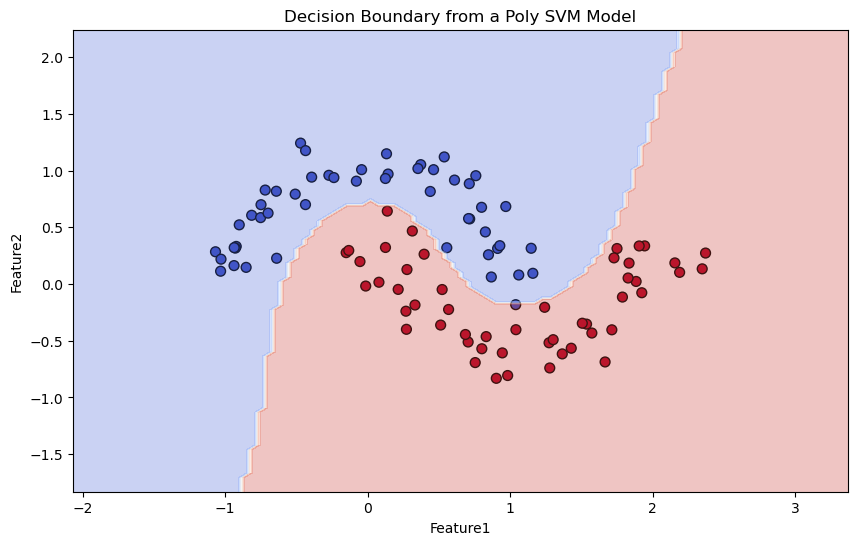

In [82]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.15)

model_poly = SVC(kernel='poly', degree= 3, coef0=1, C=5)

model_poly.fit(x, y)


plot_decision_margin(x, y, model_poly, 'Decision Boundary from a Poly SVM Model', 'Feature1', 'Feature2')

In [83]:
param_grid = {
    'C' : [1, 5, 10],
    'degree' : [1,2,3,4,4,6,7,8,9,10],
    'coef0' : [0, 1, 10]
}

best_svm_poly = GridSearchCV(model_poly, param_grid, cv=5)

best_svm_poly.fit(x, y)

GridSearchCV(cv=5, estimator=SVC(C=5, coef0=1, kernel='poly'),
             param_grid={'C': [1, 5, 10], 'coef0': [0, 1, 10],
                         'degree': [1, 2, 3, 4, 4, 6, 7, 8, 9, 10]})

In [84]:
best_svm_poly.best_estimator_

SVC(C=1, coef0=1, degree=4, kernel='poly')

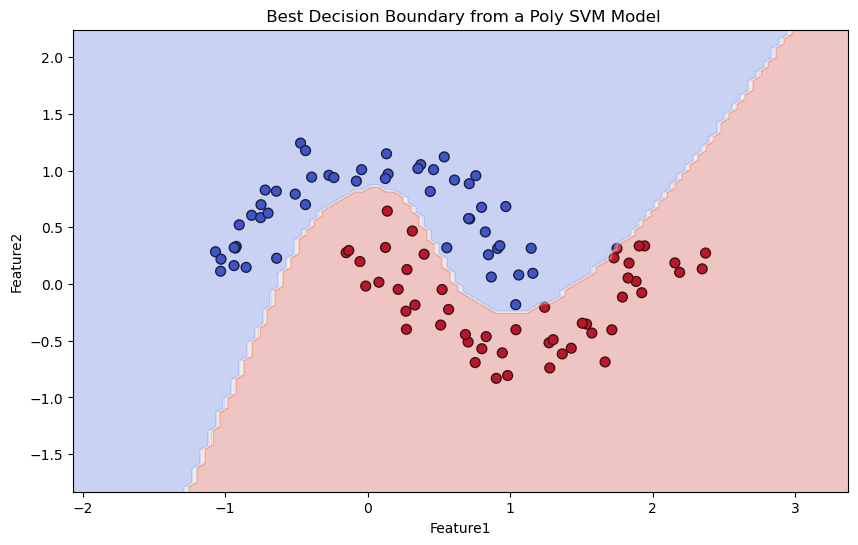

In [85]:
from sklearn.datasets import make_moons


model_poly = SVC(kernel='poly', degree= 9, coef0=1, C=1)

model_poly.fit(x, y)


plot_decision_margin(x, y, model_poly, ' Best Decision Boundary from a Poly SVM Model', 'Feature1', 'Feature2')

Regressão

In [86]:
from sklearn.svm import LinearSVR, SVR

x = iris['data'][:, (2, 3)]
y = (iris['target'] != 0)

svm_reg = LinearSVR(epsilon=1.5)

svm_reg.fit(x,y)

c:\Users\Luis Henrique\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [87]:

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(x,y)

SVR(C=100, degree=2, kernel='poly')

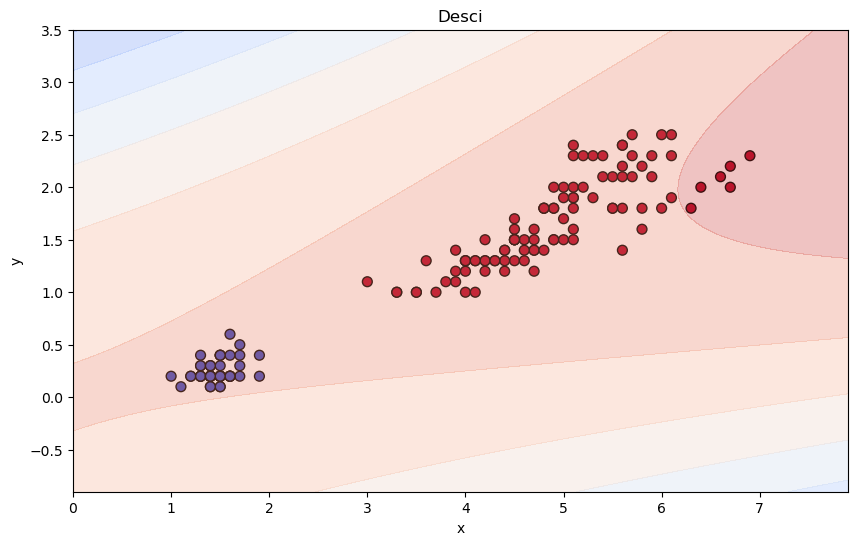

In [88]:
plot_decision_margin(x, y, svm_poly_reg, 'Desci', 'x','y')

# Árvore de Decisão

Algoritmos Versáteis que lidam com Classificações multiclasses e multiouputs e Regressões

